<a href="https://colab.research.google.com/github/rtajeong/M3_new/blob/main/M3_lab51a_text_proc_rev1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text data Processing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Bag of Words
- document-term matrix
- tfidf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [ ]:
corpus = [
    'This is the first document',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?'
]

In [ ]:
vect = CountVectorizer()
X = vect.fit_transform(corpus)

In [ ]:
X.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [ ]:

print(X.toarray())
print(vect.get_feature_names())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vect = TfidfVectorizer()
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]
 [0.  0.7 0.  0.3 0.  0.5 0.3 0.  0.3]
 [0.5 0.  0.  0.3 0.5 0.  0.3 0.5 0.3]
 [0.  0.5 0.6 0.4 0.  0.  0.4 0.  0.4]]
['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
vect = TfidfVectorizer(ngram_range=[1,2], stop_words='english')
X = vect.fit_transform(corpus)
print(X.toarray().round(1))
print(vect.get_feature_names())

[[1.  0.  0.  0. ]
 [0.6 0.5 0.5 0.5]
 [0.  0.  0.  0. ]
 [1.  0.  0.  0. ]]
['document', 'document second', 'second', 'second document']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### practical example

In [ ]:
!curl -L https://bit.ly/2WC9nvn -o spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0   1880      0 --:--:-- --:--:-- --:--:--  1905
100   137    0   137    0     0    318      0 --:--:-- --:--:-- --:--:--   318
100   340  100   340    0     0    367      0 --:--:-- --:--:-- --:--:--     0
100  488k  100  488k    0     0   353k      0  0:00:01  0:00:01 --:--:--  353k


In [ ]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head(3)

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
sms.shape

(5574, 2)

In [ ]:
sms.columns = ['category', 'text']
sms.head(3)

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
sms['category'].value_counts()

ham     4827
spam     747
Name: category, dtype: int64

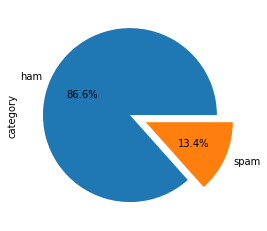

In [ ]:
sms['category'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [ ]:
sms.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_corpus = sms['text']
vect = CountVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
X.shape

(5574, 837)

In [ ]:
# 5 most frequently appeared words
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
iidx
[vect.get_feature_names()[i] for i in iidx]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ur', 'just', 'gt', 'lt', 'ok']

In [ ]:
vect = TfidfVectorizer(min_df=10, stop_words='english')
X = vect.fit_transform(sms_corpus)
iidx = X.toarray().sum(0).argsort()[-5:][::-1]
print([vect.get_feature_names()[i] for i in iidx])
print([X.toarray().sum(0)[i] for i in iidx])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['ok', 'just', 'll', 'ur', 'come']
[122.06978727192575, 106.16332625717925, 96.57382567023429, 91.57779277147964, 87.15189392798636]


### word cloud

In [ ]:
spam_sms = sms[sms["category"] == "spam"]["text"]
ham_sms = sms[sms["category"] == "ham"]["text"]

spam_words = []
ham_words = []

In [ ]:
spam_sms.values.shape

(747,)

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
for i in range(spam_sms.values.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg)
                              if word.lower() not in stopwords.words('english') and
                                 word.lower().isalpha()]
    spam_words = spam_words + words

In [ ]:
len(spam_words)

9447

In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


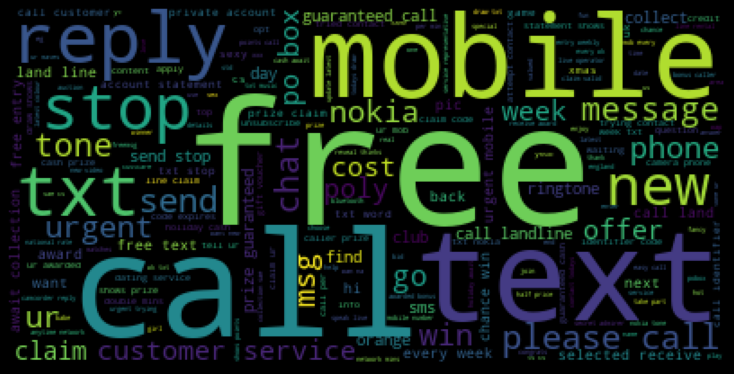

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

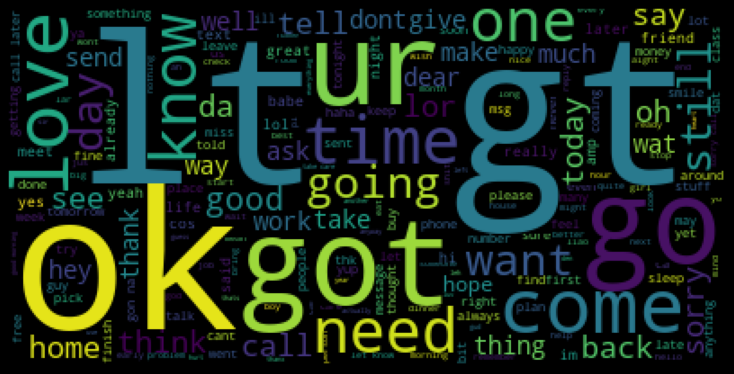

In [ ]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words
    
wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Word Embedding
- word vector

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from gensim.models.word2vec import Word2Vec

In [ ]:
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
             ['this', 'is', 'the', 'second', 'sentence'],
             ['yet', 'another', 'sentence'],
             ['one', 'more', 'sentence'],
             ['and', 'the', 'final', 'sentence']]

In [ ]:
model = Word2Vec(sentences, min_count=1, size=5)

In [ ]:
print(model)

Word2Vec(vocab=14, size=5, alpha=0.025)


In [ ]:
words = list(model.wv.vocab)   # summarize the vocabulary
words

['this',
 'is',
 'the',
 'first',
 'sentence',
 'for',
 'word2vec',
 'second',
 'yet',
 'another',
 'one',
 'more',
 'and',
 'final']

In [ ]:
model['sentence','this']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[ 0.04996074,  0.04344759,  0.06871004,  0.05680494, -0.0786621 ],
       [-0.05303725,  0.08111199,  0.06922003,  0.06125094, -0.05911021]],
      dtype=float32)

In [ ]:
# dim 5 --> dim 2  (dimension reduction)
from sklearn.decomposition import PCA


In [ ]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
result

array([[-0.06926502, -0.07368868],
       [-0.01966873, -0.06806847],
       [ 0.07842628, -0.04662023],
       [ 0.13228448, -0.00482031],
       [-0.1047755 , -0.02445501],
       [ 0.00702207,  0.09611581],
       [-0.117076  ,  0.0841181 ],
       [ 0.08315368,  0.09800746],
       [-0.11754151,  0.05964118],
       [ 0.05116985,  0.01385972],
       [-0.11007085, -0.08754486],
       [ 0.12385807, -0.02577451],
       [ 0.00827164,  0.05886584],
       [ 0.05421156, -0.07963601]], dtype=float32)

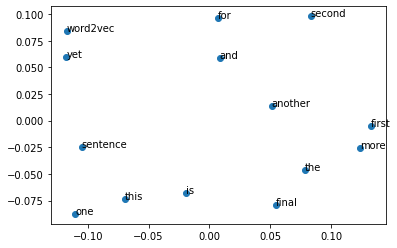

In [ ]:
plt.scatter(result[:,0], result[:,1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i,0], result[i,1]))
plt.show()

In [ ]:
model[words]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([[-0.05303725,  0.08111199,  0.06922003,  0.06125094, -0.05911021],
       [-0.02815113, -0.02587266,  0.01708711,  0.09263527, -0.00977935],
       [-0.03908554,  0.03398529, -0.09015366,  0.07075045,  0.01096842],
       [-0.01102559,  0.07954151, -0.08687703,  0.06354823,  0.09228844],
       [ 0.04996074,  0.04344759,  0.06871004,  0.05680494, -0.0786621 ],
       [ 0.04375704,  0.03716813,  0.00211845, -0.04508076,  0.04883095],
       [ 0.03455885, -0.05750919,  0.07041556, -0.06649404, -0.03703159],
       [ 0.03624976,  0.08182395, -0.04523087, -0.03392174,  0.09712996],
       [ 0.08763513,  0.02439872,  0.04167376, -0.02578536, -0.09175776],
       [-0.02944469,  0.07670394, -0.04372717,  0.00449564,  0.02597818],
       [-0.07748202,  0.00195673,  0.09728094,  0.0597875 , -0.07334182],
       [-0.02416834,  0.00081818, -0.08842892,  0.08402156,  0.09266312],
       [-0.06530096,  0.00135165, -0.02565425, -0.07409491,  0.01417409],
       [-0.05082488,  0.04448646, -0.0

In [ ]:
model.most_similar('word2vec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('yet', 0.5667425394058228),
 ('sentence', 0.19051703810691833),
 ('one', 0.1450847089290619),
 ('for', 0.06573314964771271),
 ('and', 0.020516812801361084),
 ('this', -0.19399726390838623),
 ('is', -0.3234100937843323),
 ('second', -0.449703574180603),
 ('another', -0.8176791667938232),
 ('more', -0.8420329689979553)]

In [ ]:
model.similarity('sentence', 'word2vec')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.19051701

# Pre-trained Word2Vec
- GoogleNews-vectors-negative300.bin
- Its size is too big (bigger than 1.6 GB), and it may not possible to download it. Try Glove instead.

In [ ]:
import gensim
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
!wget -P ./ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2022-07-11 10:30:10--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.142.200
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.142.200|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
!ls -l 

total 500
-rw-r--r-- 1 root root     94 Jun  1 08:57 GoogleNews-vectors-negative300.bin.gz
drwxr-xr-x 1 root root   4096 Jul  6 13:22 sample_data
-rw-r--r-- 1 root root 500336 Jul 11 10:19 spam.csv


In [ ]:
EMBEDDING_FILE = './GoogleNews-vectors-negative300.bin.gz'
word_vectors = KeyedVectors.load_word2vec_format(EMBEDDING_FILE, binary=True)

- if not work?

In [ ]:
!pip install wget
import wget, gzip
url = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
filename = wget.download(url)

f_in = gzip.open('GoogleNews-vectors-negative300.bin.gz', 'rb')
f_out = open('GoogleNews-vectors-negative300.bin', 'wb')
f_out.writelines(f_in)

In [ ]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True, limit=100000)

In [ ]:
v_apple = word_vectors["apple"] 
v_mango = word_vectors["mango"]
print(v_apple.shape)
print(v_mango.shape)
cosine_similarity([v_mango],[v_apple])

In [ ]:
words = ["soccer", "football", "baseball", "volleyball", "basketball", "tennis",
         "persimmon", "softball", "apple", "hockey", "orange", "pear", "strawberry",
         "eat", "drink", "taste", "talk", "speak", "study", "research", "have", "take"]
mat = word_vectors[words]
mat.shape

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(mat)
xs = xys[:,0]
ys = xys[:,1]

plt.figure(figsize=(12,6))
plt.scatter(xs, ys)

for i, word in enumerate(words):
    plt.annotate(word, xy=(xs[i], ys[i]), rotation=30)
plt.show()

In [2]:
import numpy as np
def odd_one_out(words):
    
    all_word_vectors = [word_vectors[w] for w in words]
    avg_vector = np.mean(all_word_vectors,axis=0)
    #print(avg_vector.shape)
    
    odd_one_out = None
    min_similarity = 1.0 
    
    for w in words:
        sim = cosine_similarity([word_vectors[w]],[avg_vector])
        if sim < min_similarity:
            min_similarity = sim
            odd_one_out = w
    
        print("Similairy btw %s and avg vector is %.2f"%(w,sim))
            
    return odd_one_out

In [ ]:
pred=[]
import pandas as pd
import numpy as np
dfx = pd.read_csv('https://raw.githubusercontent.com/shankygupta79/GoogleCollabFiles/master/OddOne.csv').values
for i in range(4,8):
    a=dfx[i]
    a=a.reshape(-1)
    pred.append(odd_one_out(a))
    
print(pred)

In [ ]:
dfx

# Glove

In [4]:
import gensim.downloader as api

glove_model = api.load('glove-twitter-25')
sample_glove_embedding=glove_model['computer']

[==================================================] 100.0% 104.8/104.8MB downloaded


In [5]:
sample_glove_embedding

array([ 0.64005 , -0.019514,  0.70148 , -0.66123 ,  1.1723  , -0.58859 ,
        0.25917 , -0.81541 ,  1.1708  ,  1.1413  , -0.15405 , -0.11369 ,
       -3.8414  , -0.87233 ,  0.47489 ,  1.1541  ,  0.97678 ,  1.1107  ,
       -0.14572 , -0.52013 , -0.52234 , -0.92349 ,  0.34651 ,  0.061939,
       -0.57375 ], dtype=float32)

In [6]:
words = ["soccer", "football", "baseball", "volleyball", "basketball", "tennis",
         "persimmon", "softball", "apple", "hockey", "orange", "pear", "strawberry",
         "eat", "drink", "taste", "talk", "speak", "study", "research", "have", "take"]
mat = glove_model[words]
mat.shape

(22, 25)

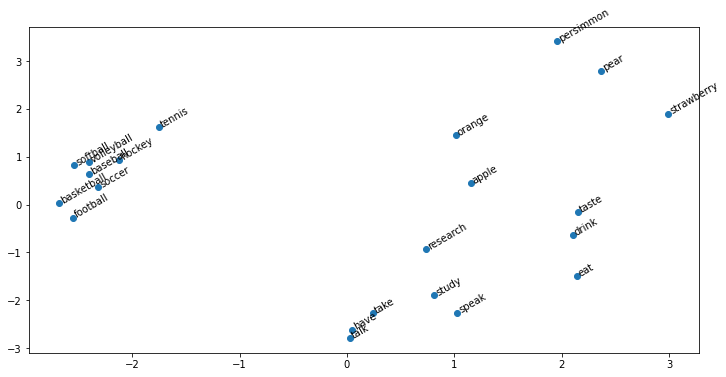

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(mat)
xs = xys[:,0]
ys = xys[:,1]

plt.figure(figsize=(12,6))
plt.scatter(xs, ys)

for i, word in enumerate(words):
    plt.annotate(word, xy=(xs[i], ys[i]), rotation=30)
plt.show()

- difference between Glove and Word2Vec
  - Both word2vec and glove enable us to represent a word in the form of a vector (often called embedding). 
  - They are the two most popular algorithms for word embeddings that bring out the semantic similarity of words that captures different facets of the meaning of a word.
  - Word2vec embeddings are based on training a shallow **feedforward neural network** while glove embeddings are learnt based on **matrix factorization** techniques.
  - Glove model is based on leveraging **global** word to word co-occurance counts leveraging the entire corpus. 
  - Word2vec on the other hand leverages co-occurance within **local** context (neighbouring words).
  - In practice, however, both these models give similar results for many tasks. 
  - Factors such as the dataset on which these models are trained, length of the vectors and so on seem to have a bigger impact than the models themselves. 